<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL Security Data Analytics and Visualisation
## Portfolio Assignment: Part 2
### Academic year: 2023-24
## Conduct a security investigation to examine and classify different malware characteristics
---

For this task, the company **UWEtech** have enlisted your support as a security data analyst once again. They believe they have found malware on some of their workstations; however they do not know what malware it is. They also believe that some machines may be infected with different kinds of malware. They have asked you to identify what malware is running on each of the contaminated machines, so that they may understand more about how this incident has occurred on their corporate network.

**Dataset:** You will be issued a dataset for this task via GitLab: https://gitlab.uwe.ac.uk/pa-legg/sdav2023

**This exercise carries a weight of 30% towards your overall portfolio submission**

### Submission Documents
---

For Part 2 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART2.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for your portfolio submission is **THURSDAY 11th JANUARY @ 14:00**. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

features = pd.read_csv('./part2/malware_data.csv', header=None)
features

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,224862.0,15842.0,12985.0,7387.0,13132.0,5112.0,8661.0,7990.0,14978.0,5656.0,...,3714.0,2892.0,9344.0,2415.0,2742.0,3023.0,11949.0,3662.0,5552.0,77433.0
1,21802.0,2127.0,2076.0,2028.0,1871.0,1622.0,1939.0,1502.0,2133.0,1689.0,...,1664.0,1607.0,1788.0,1394.0,1327.0,1453.0,1785.0,1559.0,1755.0,4882.0
2,24407.0,11682.0,7189.0,6538.0,7687.0,6848.0,4974.0,5377.0,7049.0,11642.0,...,5795.0,6053.0,6426.0,5435.0,4961.0,5026.0,5376.0,4180.0,5685.0,5775.0
3,7132.0,461.0,647.0,371.0,581.0,269.0,646.0,262.0,243.0,165.0,...,151.0,276.0,299.0,294.0,294.0,354.0,506.0,569.0,940.0,1516.0
4,5321.0,1108.0,985.0,955.0,958.0,890.0,971.0,919.0,945.0,963.0,...,933.0,975.0,945.0,924.0,879.0,952.0,956.0,900.0,942.0,1559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,23849.0,1489.0,1573.0,2649.0,1560.0,1025.0,922.0,1020.0,1042.0,938.0,...,993.0,968.0,1165.0,1041.0,1258.0,1753.0,1203.0,958.0,1315.0,4342.0
27996,9267.0,1056.0,981.0,930.0,1573.0,819.0,879.0,1064.0,1029.0,893.0,...,998.0,911.0,990.0,1039.0,930.0,833.0,904.0,891.0,976.0,2683.0
27997,25357.0,874.0,1008.0,2781.0,1518.0,939.0,4267.0,968.0,1103.0,1032.0,...,563.0,557.0,974.0,706.0,514.0,632.0,657.0,584.0,535.0,2431.0
27998,29010.0,6476.0,2969.0,5358.0,2827.0,4598.0,2172.0,4045.0,2496.0,3718.0,...,217.0,146.0,544.0,232.0,95.0,140.0,294.0,163.0,182.0,4005.0


In [2]:
labels = pd.read_csv('./part2/malware_label.csv', header=None)
labels
labels = labels.drop(0, axis=1)
labels = labels.rename(columns = {1:'label'})

labels.value_counts()
#labels

label     
bladabindi    2000
dealply       2000
emotet        2000
filetour      2000
flystudio     2000
gamarue       2000
gandcrab      2000
high          2000
razy          2000
startsurf     2000
upatre        2000
vittalia      2000
wannacry      2000
zbot          2000
Name: count, dtype: int64

In this dataset, we have collected data from 28000 systems (rows), where each system reports 256 parameters (columns).

We will first look at developing a small classifier "by hand", to help you understand how the classifier works, and then we will look at using the full dataset on more powerful classifiers to see whether we can classify the different malware varients on the set of workstations.

## Part 1: Developing a small classifier "by hand"

### Do not modify this cell

In [3]:
# DO NOT MODIFY THIS CELL
mal1_index = 17000
mal2_index = 21000
mal3_index = 12000
mal_range = 50
mal_test_range = 30

train_data = np.vstack([ features[mal1_index:mal1_index+mal_range][[0,1]].values, features[mal2_index:mal2_index+mal_range][[0,1]].values, features[mal3_index:mal3_index+mal_range][[0,1]].values ])
train_data = pd.DataFrame(train_data)
train_labels = np.vstack([ labels[mal1_index:mal1_index+mal_range].values, labels[mal2_index:mal2_index+mal_range].values, labels[mal3_index:mal3_index+mal_range].values ])
train_labels = pd.DataFrame(train_labels)
train_data['labels'] = train_labels
train_data = train_data.rename(columns={0:'x', 1:'y'})

test_data = np.vstack([ features[mal1_index+mal_range:mal1_index+mal_range+mal_test_range][[0,1]].values, features[mal2_index+mal_range:mal2_index+mal_range+mal_test_range][[0,1]].values, features[mal3_index+mal_range:mal3_index+mal_range+mal_test_range][[0,1]].values ])
test_data = pd.DataFrame(test_data)
test_labels = np.vstack([ labels[mal1_index+mal_range:mal1_index+mal_range+mal_test_range].values, labels[mal2_index+mal_range:mal2_index+mal_range+mal_test_range].values, labels[mal3_index+mal_range:mal3_index+mal_range+mal_test_range].values ])
test_labels = pd.DataFrame(test_labels)
test_data['labels'] = test_labels
test_data = test_data.rename(columns={0:'x', 1:'y'})

train_data

,x,y,labels
0,3114896.0,10815.0,wannacry
1,3436940.0,9551.0,wannacry
2,1812649.0,15343.0,wannacry
3,3067845.0,10541.0,wannacry
4,51591.0,21367.0,wannacry
...,...,...,...
145,78591.0,7734.0,razy
146,80429.0,5114.0,razy
147,2898.0,98.0,razy
148,183376.0,8477.0,razy


We now have a smaller sample of data to work with called train_data, that has three malware families included, and we have reduced the number of features to make it easier to understand the process of how the classifier operates.

### Question 1: Find the Centroid point of each of the three groups
#### (2 marks)

*Hint: We have filtered the sample to a new variable called **train_data**. Also, think about how to find the mid-point of a set of co-ordinate points **x** and **y**.*

In [4]:
# ANSWER

wannacry_centroid = []
razy_centroid = []
startsurf_centroid = []
# grouing the data by labels 
grouped_df = train_data.groupby('labels')

# Calculate the midpoint for each label and store the x and y coordinates depending on which label they belong to 
for label, group in grouped_df:
    # calculating the mean for both the coordinates x and y 
    centroid_x = group['x'].mean()
    centroid_y = group['y'].mean()

    if label == 'razy':
        razy_centroid.append((centroid_x, centroid_y))
    elif label == 'wannacry':
        wannacry_centroid.append((centroid_x, centroid_y))
    elif label == 'startsurf':
        startsurf_centroid.append((centroid_x, centroid_y))

# printing the centroids values for each group 


print ("Wannacry: ", wannacry_centroid)
print ("Razy: ", razy_centroid)
print ("Startsurf: ", startsurf_centroid)


Wannacry:  [(2181660.66, 11087.1)]
Razy:  [(100505.22, 6158.28)]
Startsurf:  [(478778.12, 3754.04)]


### Question 2: Create a Scatter Plot that shows both the train data and the corresponding centroids. Colour-code your data by group, and use a different visual marker for the centroid.

#### (2 marks)

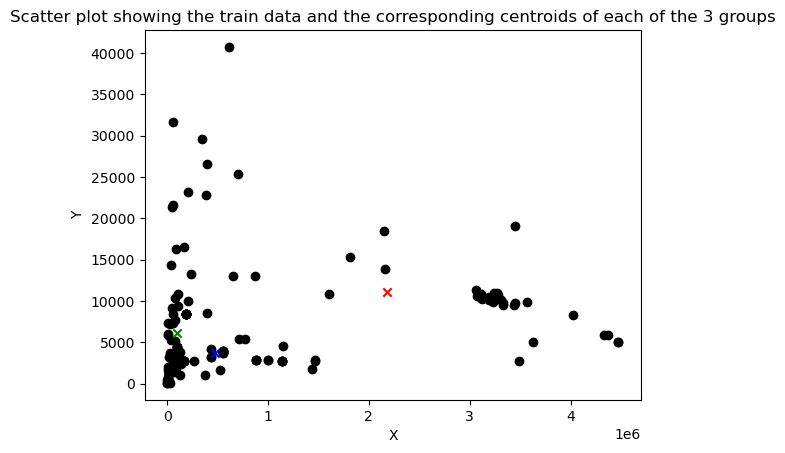

In [5]:
# ANSWER
#plotting the training data in black here 
plt.scatter(train_data.x,train_data.y,color='k')

#Representing the corresponding  centroids of each label using a X marker  

plt.scatter(wannacry_centroid[0][0], wannacry_centroid[0][1], marker='x', color='r') #wannacry centroid in red 
plt.scatter(razy_centroid[0][0], razy_centroid[0][1], marker='x', color='g')        # razy centroid in green 
plt.scatter(startsurf_centroid[0][0], startsurf_centroid[0][1], marker='x', color='b')  #startsurf centroid in blue 
plt.title('Scatter plot showing the train data and the corresponding centroids of each of the 3 groups')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Question 3a: For each point in test_data, calculate the Euclidean distance between the point and each of the three centroid points 

#### (3 marks)

### Question 3b: Use the closest centroid to assign membership and compare against the test data label to obtain a score of successful classifications 

#### (3 marks)

*Hint: You may find the clustering activity worksheet helpful for how to approach this task, and you will likely want to answer both questions within the same for loop below.*

In [28]:
# ANSWER

score = 0

wannacry=[]
razy=[]
startsurf=[]
# for each datapoint in the test data 
for i in range(test_data.shape[0]):
    
    ######### Question 3a - ADD YOUR CODE HERE ##########
    # Calculate the distance of each data point from each centroid using the Euclidean distance formula
    # Distance from the wannacry centroid 
    distance1 = np.sqrt(np.abs(test_data.loc[i, 'x'] - wannacry_centroid[0][0]) ** 2 + np.abs(test_data.loc[i, 'y'] - wannacry_centroid[0][1]) ** 2)
    #distance from the razy centroid 
    distance2 = np.sqrt(np.abs(test_data.loc[i, 'x'] - razy_centroid[0][0]) ** 2 + np.abs(test_data.loc[i, 'y'] - razy_centroid[0][1]) ** 2)
    # distance from the startsurf centroid 
    distance3 = np.sqrt(np.abs(test_data.loc[i, 'x'] - startsurf_centroid[0][0]) ** 2 + np.abs(test_data.loc[i, 'y'] - startsurf_centroid[0][1]) ** 2)
    
    #storing the calculated distances in distances 
    distances = [distance1, distance2, distance3]
    
    dist_labels = ['wannacry','razy', 'startsurf']
    # using numpy method argmin get the minimum calculated distance out of the 3 
    # append the datapoint to the specific list depending on the minimum distance 
    # then after appending check whether the classification was accurate 
    # if it is then score will be increased by 1 
    if np.argmin(distances) == 0:
            
            wannacry.append([test_data.loc[i, 'x'], test_data.loc[i, 'y']])
            if (test_data.loc[i,'labels']==dist_labels[0]):
                score += 1
    elif np.argmin(distances) == 1:
            razy.append([test_data.loc[i, 'x'], test_data.loc[i, 'y']])
            if (test_data.loc[i,'labels']==dist_labels[1]):
                score += 1
    elif np.argmin(distances) == 2:
            startsurf.append([test_data.loc[i, 'x'], test_data.loc[i, 'y']])
            if (test_data.loc[i,'labels']==dist_labels[2]):
                score += 1
    
# printing the final score 
    
print ("Score:", score)

Score: 63


### Task 4: Provide a final accuracy score for the performance of your "by hand" classifier 

#### (1 marks)

In [29]:
#ANSWER
# calculating the accuracy of the score by dividing the score obtained in question 3 by the toal number of points in test_data 
Accuracy= score/test_data.shape[0]
print(Accuracy)

0.7


## Part 2: Developing a large-scale ML classifier

We will now extend the earlier principles for the full dataset. Essentially the task is the same, we want to find the parameters that allow us to clearly separate groups for classification. You will want to consult the [scikit-learn documentation](https://scikit-learn.org/stable/index.html) to answer the following questions.

### Question 5: Scale the Features DataFrame using the StandardScaler function 

#### (1 mark)

*Hint: The variable **features** contains all of the numerical parameters that we will use to train our ML model, which we need to normalise using this function.*

In [3]:
# ANSWER
# importing needed modules 
from sklearn.preprocessing import StandardScaler
# creating an instance of StandardScaler
scaler = StandardScaler()
# Standardize the data in the features dataframe
new_df= scaler.fit_transform(features)
# Create a new dataframe new_df using features original columns 
new_df = pd.DataFrame(new_df, columns=features.columns)
new_df

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.097820,0.672159,0.826630,0.380661,0.647650,0.204495,0.792002,0.691117,1.028243,0.432558,...,0.191715,0.044177,0.845365,-0.010620,0.038420,0.068183,1.190714,0.135741,0.178144,0.406173
1,-0.355085,-0.291567,-0.274569,-0.254820,-0.323318,-0.234858,-0.178266,-0.244002,-0.310024,-0.182924,...,-0.155188,-0.155994,-0.248598,-0.175093,-0.166129,-0.179846,-0.248456,-0.168900,-0.218099,-0.238666
2,-0.351784,0.379844,0.241558,0.279985,0.178160,0.423038,0.259812,0.314504,0.202153,1.361289,...,0.543863,0.536584,0.422895,0.475873,0.359192,0.384618,0.260011,0.210779,0.192024,-0.230729
3,-0.373671,-0.408634,-0.418818,-0.451310,-0.434547,-0.405185,-0.364900,-0.422724,-0.506936,-0.419373,...,-0.411219,-0.363332,-0.464176,-0.352293,-0.315456,-0.353466,-0.429556,-0.312311,-0.303149,-0.268583
4,-0.375965,-0.363170,-0.384699,-0.382059,-0.402040,-0.327008,-0.317989,-0.328030,-0.433797,-0.295563,...,-0.278888,-0.254445,-0.370648,-0.250806,-0.230890,-0.258994,-0.365838,-0.264363,-0.302941,-0.268201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,-0.352491,-0.336398,-0.325344,-0.181181,-0.350134,-0.310013,-0.325062,-0.313473,-0.423691,-0.299442,...,-0.268735,-0.255535,-0.338796,-0.231958,-0.176103,-0.132452,-0.330864,-0.255961,-0.264016,-0.243465
27996,-0.370966,-0.366824,-0.385103,-0.385023,-0.349013,-0.335946,-0.331268,-0.307131,-0.425046,-0.306423,...,-0.267889,-0.264414,-0.364133,-0.232280,-0.223518,-0.277794,-0.373201,-0.265666,-0.299393,-0.258211
27997,-0.350581,-0.379613,-0.382378,-0.165528,-0.353755,-0.320840,0.157763,-0.320967,-0.417336,-0.284857,...,-0.341500,-0.319559,-0.366449,-0.285923,-0.283654,-0.309548,-0.408175,-0.310138,-0.345414,-0.260450
27998,-0.345952,0.014028,-0.184426,0.140058,-0.240888,0.139788,-0.144634,0.122522,-0.272205,0.131877,...,-0.400050,-0.383582,-0.428705,-0.362280,-0.344223,-0.387274,-0.459574,-0.371125,-0.382252,-0.246461


### Question 6: Use the LabelEncoder function on the Labels variable to obtain numerical label data 

#### (1 mark)

In [4]:
# ANSWER
#importing needed modules 
from sklearn.preprocessing import LabelEncoder
# create an instance of LabelEncoded to use 
label_encoder = LabelEncoder()
# Transforming the labelled data into numerical label 
labels['num_label'] = label_encoder.fit_transform(labels['label'])
labels['num_label']


0         7
1         7
2         7
3         7
4         7
         ..
27995    13
27996    13
27997    13
27998    13
27999    13
Name: num_label, Length: 28000, dtype: int32

### Question 7: Prepare the dataset for ML testing using the Train-Test-Split function
#### (1 mark)

In [5]:
# ANSWER
# Importing the train-test-split function 
from sklearn.model_selection import train_test_split
# the new dataframe which has been scaled 
X = new_df
y = labels['num_label'] # the numerical laba data obtained from question 6  
# Split the dataset into training and testing data with 20% of data allocated to testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


### Question 8: Use a Multi-Layer Perceptron (MLP) classifier to train a machine learning model, and obtain the accuracy score against your test data. 

#### (3 marks)

In [9]:
# ANSWER
# importing required modules 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# created an instance of the MLP classifier chose a random state of 42 with a max of 1000 for iterations as well as
# 2 hidden layers with 100 neurones for each layer 

mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
# Training the model using the train data 

mlp.fit(X_train, y_train)
# Making predictions on the test data 
y_pred = mlp.predict(X_test)
# Predict the accuracy of the MLP 
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8364285714285714


In [ ]:
#### The accuracy score obtained by the Random Forest : 0.83 

### Question 9: Use a Random Forest (RF) classifier to train a machine learning model, and obtain the accuracy score against your test data. 

#### (3 marks)

In [6]:
# ANSWER
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# importing the RF classifier 
randomForest_model = RandomForestClassifier()

# Train the model using the train data set 
randomForest_model.fit(X_train, y_train)
# predict using the X_test data 
y_pred = randomForest_model.predict(X_test)

# Calculate the accuracy of the RF model using the predicted value and y_test 
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.8760714285714286


#### The accuracy score obtained by the Random Forest : 0.87

### Question 10: Describe what you believe are the key findings of this task, comparing the *by-hand* classifier with the MLP classifier. As part of your discussion, consider the volume of data in both approaches and the issues of data separability. Give justifications for your answer. Limit your response to a maximum of 300 words.

#### (10 marks).

- **The key findings**: From part one, it was observed that the by-hand classifier required additional steps compared to the MLP. The steps would be computationally expensive with a higher data volume, the more classes the more variables to add the more memory consumed in order to separate the points by label. 

- Regarding the volume of the data, the MLP classifier is made specifically to handle a large volume of data in an efficient manner and would easily scale if needed as it can run processes in parallel. The by-hand classifier on the other hand, would struggle with a larger dataset or a bigger number of classes as it would require a code change which might not scale well enough to handle the data being processed. 

- Finally, when it comes to data separability, the MLP yet again performed better compared to the by-hand classifier. The MLP model has the capability to capture complex data patterns thanks to its hidden layers. Therefore, MLP has less issues with data separability which in return improves the accuracy of the model. As for the by-hand classifier, data seperability is an issue as it relies on manual decision making as can be seen in Question 3, it is therefore not effective in capturing patterns where data points of different classes overlap. Consequently no improvement of the accuracy can be obtained as it only compares to the centroids.


